In [3]:
import pandas as pd
import numpy as np

# yoochoose-clicks.dat 
The clicks of the users over the items.  
Each record/line in the file has the following fields/format: Session ID, Timestamp, Item ID, Category
- Session ID – the id of the session. In one session there are one or many clicks. Could be represented as an integer number.
- Timestamp – the time when the click occurred. Format of YYYY-MM-DDThh:mm:ss.SSSZ
- Item ID – the unique identifier of the item that has been clicked. Could be represented as an integer number.
- Category – the context of the click. The value "S" indicates a special offer, "0" indicates  a missing value, a number between 1 to 12 indicates a real category identifier, any other number indicates a brand. E.g. if an item has been clicked in the context of a promotion or special offer then the value will be "S", if the context was a brand i.e BOSCH, then the value will be an 8-10 digits number. If the item has been clicked under regular category, i.e. sport, then the value will be a number between 1 to 12. 


In [2]:
df_clicks = pd.read_csv(
    'data/yoochoose-data/yoochoose-clicks.dat', header=None, names=[
        'session_id',
        'ts',
        'item_id',
        'category'
    ])
df_clicks

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,session_id,ts,item_id,category
0,1,2014-04-07T10:51:09.277Z,214536502,0
1,1,2014-04-07T10:54:09.868Z,214536500,0
2,1,2014-04-07T10:54:46.998Z,214536506,0
3,1,2014-04-07T10:57:00.306Z,214577561,0
4,2,2014-04-07T13:56:37.614Z,214662742,0
...,...,...,...,...
33003939,11299809,2014-09-25T09:33:22.412Z,214819412,S
33003940,11299809,2014-09-25T09:43:52.821Z,214830939,S
33003941,11299811,2014-09-24T19:02:09.741Z,214854855,S
33003942,11299811,2014-09-24T19:02:11.894Z,214854838,S


In [3]:
# df_test = pd.read_csv(
#     'yoochoose-data/yoochoose-test.dat', header=None, names=[
#         'session_id',
#         'ts',
#         'item_id',
#         'category'
#     ])
# df_test

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,session_id,ts,item_id,category
0,5,2014-04-07T17:13:46.713Z,214530776,0
1,5,2014-04-07T17:20:56.973Z,214530776,0
2,5,2014-04-07T17:21:19.602Z,214530776,0
3,10,2014-04-04T07:44:14.590Z,214820942,0
4,10,2014-04-04T07:45:20.245Z,214826810,0
...,...,...,...,...
8251786,11299820,2014-09-25T08:17:19.053Z,214853094,3
8251787,11299815,2014-09-26T09:49:23.602Z,214854804,S
8251788,11299815,2014-09-26T09:49:41.808Z,214714715,S
8251789,11299810,2014-09-26T16:00:32.051Z,214546123,2


# yoochoose-buys.dat
The buy events of the users over the items.  
Each record/line in the file has the following fields: Session ID, Timestamp, Item ID, Price, Quantity  

- Session ID - the id of the session. In one session there are one or many buying events. Could be represented as an integer number.
- Timestamp - the time when the buy occurred. Format of YYYY-MM-DDThh:mm:ss.SSSZ
- Item ID – the unique identifier of item that has been bought. Could be represented as an integer number.
- Price – the price of the item. Could be represented as an integer number.
- Quantity – the quantity in this buying.  Could be represented as an integer number.

In [4]:
df_buys = pd.read_csv(
    'data/yoochoose-data/yoochoose-buys.dat', header=None, names=[
        'session_id',
        'ts',
        'item_id',
        'price',
        'quantity',
    ])
df_buys

,session_id,ts,item_id,price,quantity
0,420374,2014-04-06T18:44:58.314Z,214537888,12462,1
1,420374,2014-04-06T18:44:58.325Z,214537850,10471,1
2,281626,2014-04-06T09:40:13.032Z,214535653,1883,1
3,420368,2014-04-04T06:13:28.848Z,214530572,6073,1
4,420368,2014-04-04T06:13:28.858Z,214835025,2617,1
...,...,...,...,...,...
1150748,11368701,2014-09-26T07:52:51.357Z,214849809,554,2
1150749,11368691,2014-09-25T09:37:44.206Z,214700002,6806,5
1150750,11523941,2014-09-25T06:14:47.965Z,214578011,14556,1
1150751,11423202,2014-09-26T18:49:34.024Z,214849164,1046,1


In [5]:
# TODO: numbers don't match paper numbers
# There are 3,985,870 sessions in the training and 
# 442, 167 in the test dataset, out of which 
# 4,050,782 are labeled as negative, and 
# 377,255 are labeled as positive
for name, _df in [
    ('clicks', df_clicks), 
    ('test  ', df_test), 
    ('buys  ', df_buys)
]:
    print(f"{name} {_df['session_id'].nunique():,d}")

clicks 9,249,729
test   2,312,432
buys   509,696


# Filter sessions

In [16]:
# Filter sessions with less than 3 events
df = pd.concat([df_clicks, df_buys]).sort_values(['session_id', 'ts']).reset_index()
# df = df.head(1000)
print(f"Train sessions {df['session_id'].nunique():,d}")
df['is_purchase'] = ~df['price'].isna()
df['purchase'] = df.groupby('session_id')['is_purchase'].apply(lambda x: x.cumsum(skipna=False).shift(fill_value=0))
df['sub_session_id'] = df['session_id'].astype('str') + '_' + df['purchase'].astype('str')
print('Generated subsessions')
# Remember target
df['target'] = df.groupby('sub_session_id')['is_purchase'].transform('max')
print('Generated target')
# Drop purchase events
df = df[df['price'].isna()].drop(['price', 'quantity', 'is_purchase', 'purchase', 'index'], axis=1)
print('Filter dataset')
df = df.groupby('sub_session_id').filter(lambda x: len(x) >= 3)
print(f"Train sessions [N >= 3] {df['session_id'].nunique():,d}")
print(f"Train sub sessions [N >= 3] {df['sub_session_id'].nunique():,d}")
df

Train sessions 9,249,729
Generated subsessions
Generated target
Filter dataset
Train sessions [N >= 3] 4,422,231
Train sub sessions [N >= 3] 4,429,938


,session_id,ts,item_id,category,sub_session_id,target
0,1,2014-04-07T10:51:09.277Z,214536502,0,1_0,False
1,1,2014-04-07T10:54:09.868Z,214536500,0,1_0,False
2,1,2014-04-07T10:54:46.998Z,214536506,0,1_0,False
3,1,2014-04-07T10:57:00.306Z,214577561,0,1_0,False
4,2,2014-04-07T13:56:37.614Z,214662742,0,2_0,False
...,...,...,...,...,...,...
34154676,11562147,2014-09-27T16:42:43.453Z,214851238,1,11562147_0,False
34154677,11562147,2014-09-27T16:46:02.906Z,214851238,1,11562147_0,False
34154692,11562158,2014-09-26T04:50:29.172Z,214849132,S,11562158_0,False
34154693,11562158,2014-09-26T04:52:21.900Z,214854774,S,11562158_0,False


In [29]:
# Keep only up to 100 last events
MAX_LEN = 100
df.groupby('sub_session_id').head(MAX_LEN-1).reset_index(drop=True)
print(f"Train sub sessions [N < {MAX_LEN}] {df['sub_session_id'].nunique():,d}")
print(f"vs {3985870+442167:,d} from the paper")

Train sub sessions [N < 100] 4,429,938
vs 4,428,037 from the paper


In [30]:
# Only the activities having more than 5 occurrences in the whole dataset were kept,
# which resulted in 52,739 unique activities in the final vocabulary.
df['action'] = df['item_id'].astype('str') + '_' + df['category'].astype('str')
print(f"Actions {df['action'].nunique():,d}")
print(f"Actions [N > 5] {df.groupby('action').filter(lambda x: len(x) > 5)['action'].nunique():,d}")
print(f"vs {52739:,d} from the paper")

Actions 90,534
Actions [N > 5] 56,613
vs 52,739 from the paper


In [47]:
df = df.groupby('action').filter(lambda x: len(x) > 5)
df.to_csv('data/yoochoose-data/df.csv')

In [4]:
df = pd.read_csv('data/yoochoose-data/df.csv', index_col=0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# TASA model
[Good intro to Seq2Seq with Keras](https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html)
![TASA architecture](img/TASAArchitecture.png "TASA architecture")

In [155]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Embedding, multiply
from keras.preprocessing.sequence import pad_sequences
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.initializers import RandomUniform
from keras.callbacks import ModelCheckpoint, TensorBoard
from datetime import datetime

In [70]:
df = _df.copy()
# df = _df[_df['session_id'].isin([1, 11])]
df['ts'] = pd.to_datetime(df['ts'])
df

,session_id,ts,item_id,category,sub_session_id,target,action
0,1,2014-04-07 10:51:09.277000+00:00,214536502,0,1_0,False,214536502_0
1,1,2014-04-07 10:54:09.868000+00:00,214536500,0,1_0,False,214536500_0
2,1,2014-04-07 10:54:46.998000+00:00,214536506,0,1_0,False,214536506_0
3,1,2014-04-07 10:57:00.306000+00:00,214577561,0,1_0,False,214577561_0
4,2,2014-04-07 13:56:37.614000+00:00,214662742,0,2_0,False,214662742_0
...,...,...,...,...,...,...,...
34154676,11562147,2014-09-27 16:42:43.453000+00:00,214851238,1,11562147_0,False,214851238_1
34154677,11562147,2014-09-27 16:46:02.906000+00:00,214851238,1,11562147_0,False,214851238_1
34154692,11562158,2014-09-26 04:50:29.172000+00:00,214849132,S,11562158_0,False,214849132_S
34154693,11562158,2014-09-26 04:52:21.900000+00:00,214854774,S,11562158_0,False,214854774_S


In [71]:
# Add stop features - variance is small
df['t'] = df['ts'].values.astype(np.int64) // 10 ** 9
df['tau'] = df.groupby('sub_session_id')['t'].transform(lambda x: x / x.iloc[-1])
df['tau'].describe()

count    2.448996e+07
mean     9.999996e-01
std      8.125702e-07
min      9.998256e-01
25%      9.999996e-01
50%      9.999999e-01
75%      1.000000e+00
max      1.000000e+00
Name: tau, dtype: float64

In [72]:
BATCH_SIZE = 64
EPOCHS = 10
LR = 0.001
HIDDEN_DIM = 100  # dimension of lstm - M
EMBEDDING_DIM = 100  # D
MAX_LEN = 100

In [73]:
BOS, EOS = "<BOS>", "<EOS>"
eos = df.groupby('sub_session_id').last().reset_index()
eos['action'] = EOS
bos = df.groupby('sub_session_id').first().reset_index()
bos['action'] = BOS
bos['tau'] = 0
df = pd.concat([bos, df, eos]).sort_values(['sub_session_id', 'ts']).reset_index()
df

,index,sub_session_id,session_id,ts,item_id,category,target,action,t,tau
0,0,10000001_0,10000001,2014-09-08 10:35:38.841000+00:00,214854230,S,False,<BOS>,1410172538,0.000000
1,29700968,10000001_0,10000001,2014-09-08 10:35:38.841000+00:00,214854230,S,False,214854230_S,1410172538,0.999999
2,29700969,10000001_0,10000001,2014-09-08 10:40:20.143000+00:00,214556216,S,False,214556216_S,1410172820,1.000000
3,29700970,10000001_0,10000001,2014-09-08 10:40:36.704000+00:00,214556212,S,False,214556212_S,1410172836,1.000000
4,29700971,10000001_0,10000001,2014-09-08 10:41:12.386000+00:00,214854230,S,False,214854230_S,1410172872,1.000000
...,...,...,...,...,...,...,...,...,...,...
33345252,4427647,9_0,9,2014-04-06 11:26:24.127000+00:00,214576500,0,False,<BOS>,1396783584,0.000000
33345253,21,9_0,9,2014-04-06 11:26:24.127000+00:00,214576500,0,False,214576500_0,1396783584,1.000000
33345254,22,9_0,9,2014-04-06 11:28:54.654000+00:00,214576500,0,False,214576500_0,1396783734,1.000000
33345255,23,9_0,9,2014-04-06 11:29:13.479000+00:00,214576500,0,False,214576500_0,1396783753,1.000000


In [74]:
# vocab creation
VOCAB_SIZE = df['action'].nunique() + 3

BOS, EOS = "<BOS>", "<EOS>"
action2ix = {}
action2ix[BOS] = 1
action2ix[EOS] = 2
for i, action in enumerate(df['action'].unique()):
    action2ix[action] = i + 3
ix2action = {ix: action for action, ix in action2ix.items()}

# the last 100 events were kept, otherwise, the trails were padded
def preprocess_actions(sequences):
    return pad_sequences([
        [action2ix[a] for a in seq] for seq in sequences
    ], maxlen=MAX_LEN, dtype='int32')

def preprocess_taus(sequences):
    return pad_sequences(sequences, maxlen=MAX_LEN, dtype='float32')

# create arrays
ix = df['action'] != BOS
action_inputs = preprocess_actions(df[ix].groupby('sub_session_id')['action'].apply(np.array))  # 3D array N x MAX_LEN x ?[VOCAB_SIZE]
temporal_inputs = preprocess_taus(df[ix].groupby('sub_session_id')['tau'].apply(np.array))

decoder_target_data = preprocess_actions(df[ix].groupby('sub_session_id')['action'].apply(np.array))  # is the same as decoder_input_data but offset by one timestep
# decoder_target_data[:, t, :] will be the same as decoder_input_data[:, t + 1, :]  <- teacher forcing

ix = df['action'] != EOS
decoder_action_inputs = preprocess_actions(df[ix].groupby('sub_session_id')['action'].apply(np.array))  # 3D array N x MAX_LEN (out) x ?[VOCAB_SIZE]
decoder_temporal_inputs = preprocess_taus(df[ix].groupby('sub_session_id')['tau'].apply(np.array)

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
decoder_tau (InputLayer)        [(None, 100)]        0                                            
__________________________________________________________________________________________________
decoder_actions (InputLayer)    [(None, 100)]        0                                            
__________________________________________________________________________________________________
tau (InputLayer)                [(None, 100)]        0                                            
__________________________________________________________________________________________________
actions (InputLayer)            [(None, 100)]        0                                            
_______________________________________________________________________________________

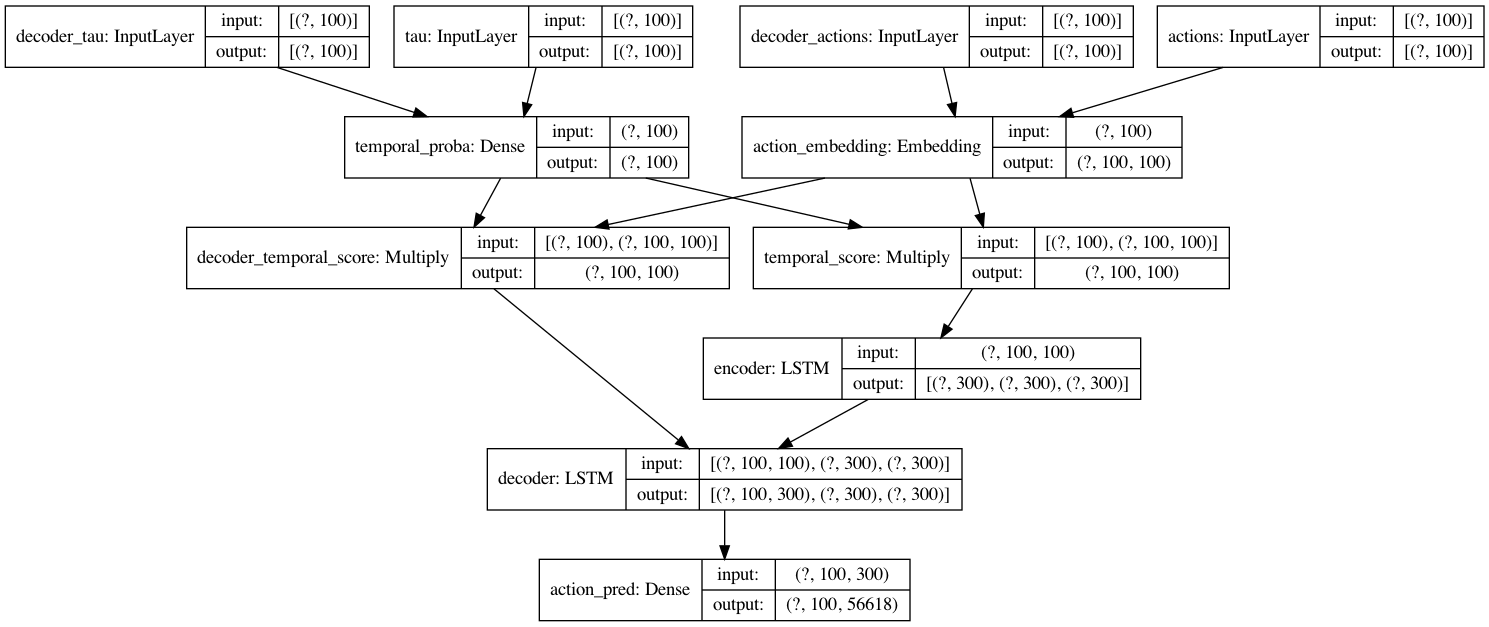

In [146]:
# The activity and user embedding dimensions were set to 100.
# The activity embeddings were initialized to random uniform numbers in [−0.05, 0.05]
embedding_layer = Embedding(
    input_dim=VOCAB_SIZE, 
    output_dim=EMBEDDING_DIM,
    input_length=MAX_LEN,
    mask_zero=True,
    embeddings_initializer=RandomUniform(minval=-0.05, maxval=0.05),
    trainable=True,
    name='action_embedding')
temporal_layer = Dense(MAX_LEN, activation='sigmoid', name='temporal_proba')



def seq2seq_model_builder(HIDDEN_DIM=100):
    
    encoder_inputs = Input(shape=(MAX_LEN,), dtype='int32', name='actions')
    encoder_embedded = embedding_layer(encoder_inputs)

    tau_inputs = Input(shape=(MAX_LEN,), dtype='float32', name='tau')
    tau_outputs = temporal_layer(tau_inputs)
    temporal_score = multiply([tau_outputs, encoder_embedded], name='temporal_score')
    
    encoder_LSTM = LSTM(
        HIDDEN_DIM,
        name="encoder",
        return_state=True,
        activation="tanh",
#         recurrent_activation=None,  # TODO: recurrent_activation - None?, default - sigmoid
        use_bias=True,
        # TODO: hj is initially generated using an orthogonal initialization
        # TODO: Cj is initialized as a mixture of uniform and orthogonal random values.
        # TODO: the sequential embeddings were initialized using an orthogonal initialization with a multiplicative factor of 1.
        kernel_initializer="glorot_uniform",   # W - MxD, U - MxM,
        recurrent_initializer="orthogonal",
        bias_initializer="zeros",   # b - M
    )
    encoder_outputs, state_h, state_c = encoder_LSTM(temporal_score)
    encoder_states = [state_h, state_c]  # context of the decoder
    
    decoder_inputs = Input(shape=(MAX_LEN,), dtype='int32', name='decoder_actions')
    decoder_embedded = embedding_layer(decoder_inputs)
    
    decoder_tau_inputs = Input(shape=(MAX_LEN,), dtype='float32', name='decoder_tau')
    decoder_tau_outputs = temporal_layer(decoder_tau_inputs)
    decoder_temporal_score = multiply([decoder_tau_outputs, decoder_embedded], name='decoder_temporal_score')
    
    decoder_LSTM = LSTM(
        HIDDEN_DIM,
        name="decoder", 
        return_state=True, 
        return_sequences=True
    )
    decoder_outputs, _, _ = decoder_LSTM(decoder_temporal_score, initial_state=encoder_states)
    
    dense_layer = Dense(VOCAB_SIZE, activation='softmax', name='action_pred')
    # outputs = TimeDistributed(Dense(VOCAB_SIZE, activation='softmax'))(decoder_outputs)  # TODO:
    outputs = dense_layer(decoder_outputs)
    model = Model([encoder_inputs, tau_inputs, decoder_inputs, decoder_tau_inputs], outputs)
    
    return model
model = seq2seq_model_builder(HIDDEN_DIM=300)
model.summary()
plot_model(model, show_shapes=True, to_file='img/TASAKeras.png')

In [144]:
# # TODO: add decoder evaluation metrics ROUGE, BLEU
# def reconstruction_accuracy(y_true, y_pred):
#     y_true = tf.cast(y_true, tf.int32)
#     y_pred = tf.argmax(y_pred, axis=2, output_type=tf.int32)
#     equal_reconstruction = tf.reduce_sum(
#           tf.where(
#               y_pred==0,
#               0.,
#               tf.cast(tf.equal(y_true, y_pred), tf.float32), 
#           ), 
#     1) / tf.reduce_sum(tf.where(
#               y_pred==0,
#               0.,
#               1., 
#           ))
#     return tf.reduce_mean(equal_reconstruction, axis=-1)  # Note the `axis=-1`

# y_pred = tf.constant([[[0.5, 0.3, 0.1], [0.2, 0.1, 0.7]]])
# y_true = tf.constant([[0., 2.]])
# tf.print(reconstruction_accuracy(y_true, y_pred))
# m = tf.keras.metrics.SparseCategoricalCrossentropy()
# m.update_state([0, 2], [[0.5, 0.3, 0.1], [0.2, 0.1, 0.7]])
# tf.print(m.result().numpy())
# m = tf.keras.metrics.SparseCategoricalAccuracy()
# m.update_state([0, 1], [[0.5, 0.3, 0.1], [0.2, 0.1, 0.7]])
# tf.print(m.result().numpy())

1
0.4722308
0.5


In [ ]:
log_dir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir)
checkpoint = ModelCheckpoint("data/tasa.h5", verbose=1, save_best_only=True, mode='auto')
model.compile(
    optimizer=Adam(learning_rate=LR),  # 10 epochs using the Adam optimizer with a learning rate of 0.001
    loss='sparse_categorical_crossentropy',  #  logistic loss, we expect labels to be provided as integers.
    metrics=[
        'sparse_categorical_accuracy',
    ]
)

# n = 1000

model.fit(
    [action_inputs, temporal_inputs, decoder_action_inputs, decoder_temporal_inputs], 
    decoder_target_data,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=0.2,
    callbacks=[tensorboard_callback, checkpoint],
)

Epoch 1/10
    1/55346 [..............................] - ETA: 1:25 - loss: 0.1778 - sparse_categorical_accuracy: 0.4595WARNING:tensorflow:From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
   17/55346 [..............................] - ETA: 156:28:41 - loss: 0.2199 - sparse_categorical_accuracy: 0.4166